# A Hands-on Tutorial for GNU Octave
## MAT 355, Numerical Mathematics and Computation
### Pavel B\&\#283l\&\#237k

This is a very brief tutorial into GNU Octave/MATLAB that will guide you through some commands with the understanding that you will be interpreting their outputs on your own. Always ask if something doesn't make sense or isn't clear. We'll only cover some basics that will be useful to us in the course. Since you will most likely have easy access to GNU Octave, I'll refer to the software as Octave (but everything below refers to MATLAB as well). **Another, more extensive MATLAB tutorial can be found on Moodle**.

## 1. Evaluations, Assignments, Algebraic Operations

You can use Octave as a simple calculator. Type in the following expressions (one by one; end of a line means that you should hit *Enter*:

In [1]:
3 + 2^(-0.5)
sin(1)
3.5 * 1.5 / 22.34

ans =  3.7071
ans =  0.84147
ans =  0.23500


Do you see the same outputs as here? Now, if you type in the same command followed by a semi-colon, say ```3.5 * 1.5 / 22.34```, you will see no output. **The semi-colon suppresses the output.** The spaces aren't essential; you could just as well write ```3.5*1.5/22.34``` and get the same output. However, the readability of the code might be affected without using spaces---strive for a readable code!

If you want to assign a specific value to a variable, say ```a```, you use the assignment symbol ```=```. First, type in the following to see if any of these variables are already defined:

In [2]:
a
i
j
k

error: 'a' undefined near line 1 column 1
ans =  0 + 1i
ans =  0 + 1i
error: 'k' undefined near line 1 column 1


You should see that both ```i``` and ```j``` are by default defined as $\sqrt{-1}=0+1i$, but ```a``` and ```k``` have no values. Let's assign some values (you can also overwrite ```i``` and ```j```):

In [3]:
a = sqrt(2)
i = 15
k = 1/3

a =  1.4142
i =  15
k =  0.33333


Did you get the outputs ```1.4142```, ```15``` and ```0.33333```, respectively? The display format seems kind of short. Let's change it so that we can see more digits in the values:

In [4]:
format long
a
i
k

a =  1.414213562373095
i =  15
k =    3.333333333333333e-01


To switch back to the default format, you can just type ```format``` or ```format short```. In general, if you know the name of the command, you can use the built-in help by typing ```help ``name of the command''``` as in the following: ```help format```. Try it.

When using assignments of the form ```left-hand side = right-hand side```, the right-hand side is evaluated first and then assigned to the left-hand side. Therefore, the following assignments make perfect sense (except for the last one!):

In [5]:
a = a^2
i = i + a
k = i*a/k
a_2 = a * a
a^2 = a * a

a =  2.000000000000000
i =  17
k =  102.0000000000000
a_2 =  4.000000000000002
parse error:

  invalid left hand side of assignment

>>> a^2 = a * a
        ^



Note that now the new values of ```a```, ```i```, and ```k``` are 2, 17, and 102, respectively.

If you are familiar with other programming languages, you probably noticed by now that **there are no declarations of types of numbers}** All numbers are treated as floating point numbers by default.

## 2. Built-in Constants and Functions

Octave has many built-in constants and functions. Some that might be of interest to us are: the machine epsilon, ```eps```, and $\pi$, ```pi```:

In [6]:
format long
eps
pi

ans =    2.220446049250313e-16
ans =  3.141592653589793


Many built-in functions are as you would expect: ```sin```, ```cos```, ```tan```, ```asin```, ```acos```, ```atan``` (trigonometric functions and their inverses); ```sqrt```, ```abs```; ```exp```, ```log``` (natural logarithm), and also ```log2```, ```log10``` (for $\log_2$ and $\log_{10}$). Try, for example, the following:

In [7]:
exp(1)
log(1)
asin(sin(4*pi))
sqrt(abs(-4))

ans =  2.718281828459045
ans = 0
ans =   -4.898587196589413e-16
ans =  2


Why is the third output what it is?

## 3. Vectors and Matrices

The power and beauty of Octave is in how easily and efficiently it handles vectors and matrices. A vector is a one-dimensional array of numbers (arranged in a row or a column), while a matrix is a two-dimensional one. Let's look at row vectors first:

In [8]:
v1 = [1 2 3 4 5]
v2 = [5, 4, 3, 2, 1]
length(v1), length(v2)
size(v1), size(v2)

v1 =

   1   2   3   4   5

v2 =

   5   4   3   2   1

ans =  5
ans =  5
ans =

   1   5

ans =

   1   5



Here we have defined two vectors, ```v1``` and ```v2```, both row vectors of length 5, hence of size $1\times5$ (one row of 5 entries). Note that you can separate the entries of a vector by spaces or commas. We can now easily add the two vectors:

In [9]:
v = v1 + v2

v =

   6   6   6   6   6



We get a vector ```v = [6 6 6 6 6]```. What happens if we multiply them?

In [10]:
v1 * v2

error: operator *: nonconformant arguments (op1 is 1x5, op2 is 1x5)


We see that we get an error, as we are attempting a *matrix multiplication*, which can't be done with two $1\times5$ vectors. However, we can multiply these two vectors **entry-wise**:

In [11]:
v1 .* v2

ans =

   5   8   9   8   5



We get a vector ```[5 8 9 8 5]```. The dot in front of the ```*``` says that vectors should be multiplied entry-by-entry. So, ```[5 8 9 8 5] = [1*5 2*4 3*3 4*2 5*1]```. We could, in the same fashion, divide the two vectors or square all entries of a vector:

In [12]:
v1 ./ v2
v1 .^ 2

ans =

 Columns 1 through 3:

   2.000000000000000e-01   5.000000000000000e-01   1.000000000000000e+00

 Columns 4 and 5:

   2.000000000000000e+00   5.000000000000000e+00

ans =

    1    4    9   16   25



Also, many built-in functions allow you to apply them to a vector. What happens when we do the following?

In [13]:
sqrt(v1)
sin(v2)
log(v)

ans =

 Columns 1 through 4:

   1.000000000000000   1.414213562373095   1.732050807568877   2.000000000000000

 Column 5:

   2.236067977499790

ans =

 Columns 1 through 3:

  -9.589242746631385e-01  -7.568024953079282e-01   1.411200080598672e-01

 Columns 4 and 5:

   9.092974268256817e-01   8.414709848078965e-01

ans =

 Columns 1 through 4:

   1.791759469228055   1.791759469228055   1.791759469228055   1.791759469228055

 Column 5:

   1.791759469228055



Do you see how these functions are applied to each component? This can be used in many applications and we'll see one such use later when we discuss plotting.

There are some quick ways to construct vectors with a certain pattern. Below are some commands for you to try:

In [14]:
zeros(1,10)
v3 = 1:10
v4 = 0:0.1:1
n = 5, v5 = n:-0.2:1   % Notice the negative middle number here to achieve decrements, rather than increments
linspace(1, 41, 11)   % linear space from 1 to 41 with 11 points

ans =

   0   0   0   0   0   0   0   0   0   0

v3 =

    1    2    3    4    5    6    7    8    9   10

v4 =

 Columns 1 through 3:

    0.000000000000000e+00    1.000000000000000e-01    2.000000000000000e-01

 Columns 4 through 6:

    3.000000000000000e-01    4.000000000000000e-01    5.000000000000000e-01

 Columns 7 through 9:

    6.000000000000001e-01    7.000000000000001e-01    8.000000000000000e-01

 Columns 10 and 11:

    9.000000000000000e-01    1.000000000000000e+00

n =  5
v5 =

 Columns 1 through 3:

    5.000000000000000    4.800000000000000    4.600000000000000

 Columns 4 through 6:

    4.400000000000000    4.200000000000000    4.000000000000000

 Columns 7 through 9:

    3.800000000000000    3.600000000000000    3.400000000000000

 Columns 10 through 12:

    3.200000000000000    3.000000000000000    2.800000000000000

 Columns 13 through 15:

    2.600000000000000    2.400000000000000    2.200000000000000

 Columns 16 through 18:

    2.000000000000000    1.80000

Looking at the outputs, does the notation $a:b$ and $a:b:c$ make sense?

A column vector can be easily constructed from a row vector by transposing it using ```'``` at the end, or by using semi-colons between the entries:

In [15]:
v3 = [1 2 3 4 5]'
v4 = [1; 2; 3; 4; 5]
length(v3), length(v4)
size(v3), size(v4)

v3 =

   1
   2
   3
   4
   5

v4 =

   1
   2
   3
   4
   5

ans =  5
ans =  5
ans =

   5   1

ans =

   5   1



Note that these have dimension $5\times1$. You only have to be careful with vectors with complex entries. A single ```'``` creates a conjugate transpose; if you want a regular transpose, use ```.'```. Try both with ```v = [1+2*I 2-4*I 3+6*I]``` to see the difference:

In [16]:
v = [1+2*I 2-4*I 3+6*I]
v'
v.'

v =

   1 + 2i   2 - 4i   3 + 6i

ans =

   1 - 2i
   2 + 4i
   3 - 6i

ans =

   1 + 2i
   2 - 4i
   3 + 6i



A matrix is an $m\times n$ array of $m\cdot n$ objects (typically numbers). They can be added or subtracted using ```+/-``` (entry-wise), multiplied using ```*``` (matrix multiplication), or multiplied using ```.*``` (entry-wise):

In [17]:
A = [1 2 3; 4 5 6]
B = [0 1 -1; 2 -1 0]
size(A), size(B)
A + B
A - B
A * B
A .* B

A =

   1   2   3
   4   5   6

B =

   0   1  -1
   2  -1   0

ans =

   2   3

ans =

   2   3

ans =

   1   3   2
   6   4   6

ans =

   1   1   4
   2   6   6

error: operator *: nonconformant arguments (op1 is 2x3, op2 is 2x3)
ans =

   0   2  -3
   8  -5   0



Note that of the above commands, only ```A * B``` can't be performed because two $2\times3$ matrices can't be multiplied. However, try to multiply ```A' * B``` or ```A * B'``` to get a $3\times3$ or $2\times2$ output, respectively. (Don't worry about this if you don't know matrix multiplication. Just remember the difference between ```*``` and ```.*```!)

Finally, to access an entry of a vector or a matrix, we can simply write ```v(3)``` for the third entry of a vector ```v``` or ```A(2,3)``` for the entry in the second row and third column of the matrix ```A```. If you want to get a full row, try ```A(1,:)```. For a full column, try ```A(:,2)```. What do you get?

## 4. Printing and Plotting

Frequently, you will want your code to print out some intermediate results, comments, warnings, etc. One easy way is to use the command ```disp``` (as in display):

In [18]:
a = 2;
disp(a)
disp('This is a warning!')
disp("This is a warning!")   % MATLAB requires single quotes, Octave can take either!

 2
This is a warning!
This is a warning!


When displaying numbers, you should **format the output** so that enough information is shown. This can be done using the command ```printf```:

In [19]:
i = 3; t = 1/3; r = sqrt(2); e = 1.23456789*10^(-12);
printf("i = %3d, t = %12.10f, r = %7.6g, e = %10.8e\n", i, t, r, e)
i = 333; t = 1/3; r = sqrt(2); e = 1.23456789*10^(-12);
printf("i = %3d, t = %16.14f, r = %13.12g, e = %18.16e\n", i, t, r, e)

i =   3, t = 0.3333333333, r = 1.41421, e = 1.23456789e-12
i = 333, t = 0.33333333333333, r = 1.41421356237, e = 1.2345678899999998e-12


In the above command, we are putting the output all on one line (```\n``` is an end-of-line character), arranged in the order: ```i```, ```t```, ```r```, ```e```. The formatting is as follows: ```i``` is an integer displayed in a three-digit format (```%3d```); then ```t``` is displayed in the floating-point format with 10 decimal places and 12 total digits (```%12.10f```); the final number, ```e``` is similarly displayed but in the scientific format with 8 decimal digits (the 10 can be pretty much anything); finally, the number ```r``` is displayed using the ```g``` format that automatically selects the better of the ```f``` or ```e``` formats depending on the magnitude of the number to be displayed.

For simple 2D plotting, there is the command ```plot```. We will be mostly interested in plotting scalar functions of one variable, $y=f(x)$. This isn't as straightforward as in *Mathematica*, but it's still pretty straightforward. The command ```plot``` is very flexible with many options, but here we will touch on just some basics. Execute the following commands one by one and observe what happens. Try to figure out what everything in the commands stands for.

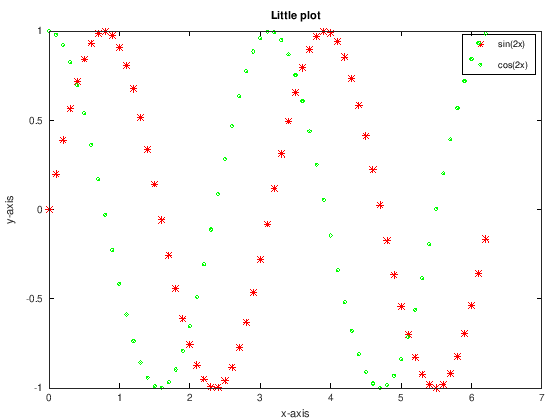

In [20]:
x = 0:0.1:2*pi; % Will plot on the interval [0,2*pi] at points 0.1 units apart
y1 = sin(2*x); y2 = cos(2*x);
plot(y1) % Check the x-axis; what do you see?
plot(x,y1)
plot(x,y1,x,y2)
plot(x,y1,"r",x,y2)
plot(x,y1,"r",x,y2,"g")
plot(x,y1,"r*",x,y2,"go")
plot(x,y1,"r*",x,y2,"markersize",3,"go")
title("Little plot")
xlabel("x-axis")
ylabel("y-axis")
grid
grid
grid on
grid off
legend("sin(2x)", "cos(2x)")

Finally, a useful set of commands for comparable plots are below. Evaluate to see what they produce. Add labels and legends as appropriate.

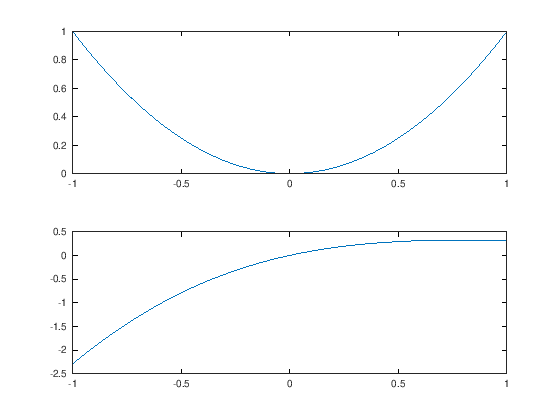

In [21]:
x = -1:0.01:1;
y1 = x.^2; y2 = sin(x)./exp(x);
subplot(2,1,1)
plot(x,y1)
subplot(2,1,2)
plot(x,y2)

Other useful commands for 2D plotting are ```loglog```, ```semilogx```, and ```semilogy```. Use the ```help``` command to see what they do.

## 5. ```For``` Loops and ```if``` Statements

In our coding exercises, we will frequently need to repeat a certain step several times. This can be achieved using a ```for``` loop. Try the following commands:

In [22]:
n = 20;
F = zeros(1,n);
F(1) = 1; F(2) = 1;
for i = 3:n   % repeat the statement below for i changing from 3 to n
  F(i) = F(i-1) + F(i-2);
end
F

F =

 Columns 1 through 11:

      1      1      2      3      5      8     13     21     34     55     89

 Columns 12 through 20:

    144    233    377    610    987   1597   2584   4181   6765



Can you see that your vector ```F``` now contains the first 20 Fibonacci numbers? Here is another example:

In [23]:
a = 5;
for i=10:-1:1
  a = 0.5*(a + 2/a)
end

a =  2.700000000000000
a =  1.720370370370370
a =  1.441455368177650
a =  1.414470981367771
a =  1.414213585796884
a =  1.414213562373095
a =  1.414213562373095
a =  1.414213562373095
a =  1.414213562373095
a =  1.414213562373095


What do you think this code computes? What is ```a``` at the end?

When the number of repeated steps is unknown ahead of time, a ```while``` loop or a ```do``` loop may be more useful. Check out their syntax on your own using the command ```help while``` or ```help do```.

Another important concept for us will be the ```if``` statement. It can come in different flavors. The code below simply turns a negative number into a positive number, so in effect, it changes ```x``` to the absolute value of ```x```:

In [24]:
x = -5

if x < 0
    x = -x;
end

x

x = -5
x =  5


A more complicated ```if``` statement can look like this:

In [25]:
x = -12

if x > 0
  disp('x is positive')
elseif x < 0
  disp('x is negative')
else
  disp('x is zero')
end

x = -12
x is negative


Does this make sense? Comparisons of numbers are done in the following way: ```x == y``` (test of equality: dangerous; watch for roundoff errors!), ```x < y```, ```x <= y```, ```x > y```, ```x >= y```, ```x ~= y``` (or ```x != y```, tests if ```x``` and ```y``` are NOT equal). These can be combined using ```&``` or ```&&``` (for "and") and ```|``` or ```||``` (for "or"). For example, the test ```if x > 0 && x < 5``` will be true if ```x``` is between 0 and 5; the test ```if x > 0 || x < 5``` will be true for every ```x``` (are you convinced?).

## 6. Functions

Finally, probably the **most important concept** we will need is that of a function. We will mostly be creating the so-called ```m```-files (or MATLAB files) containing functions for our future use. The ```m```-files will be named ```functionName.m``` where the ```functionName``` will be the *name of the function residing inside this file*. For example, let's create a function that solves the quadratic equation $$ax^2+bx+c=0.$$ There are (always) two (possibly complex) roots, so let's have our function return both of them. The input will be a vector of the three coefficients $a$, $b$, and $c$, and the output will be a vector with the two roots. (*Note: This is a very naive implementation. We may discuss a better one later in the course.*)

First, create a file named ```QuadRoots.m``` and type the following code (the lines starting with ```%``` are comments and can be left out) inside:

In [26]:
function roots = QuadRoots(coef)

%**************************************************************
% Compute the roots of the quadratic polynomial a*x^2 + b*x + c
% whose coefficients a, b, c are stored in coef:
%                 coef = [a b c]
% Inputs:
%    coef = [a b c]: the coefficients of the polynomial
%
% Output:
%    roots = [root1 root2]: the roots of the polynomial
%
% Usage:
%    roots = QuadRoots([1 2 3])
%
% Written by PB, January 6, 2009.
%**************************************************************


% Check for correct size of the input
[m n] = size(coef);
if (m != 1 || n != 3)
  printf("Input needs to be a 1x3 vector. You entered a %d x %d array.\n", m, n);
  return;
end

% Use working variables a, b, c for less writing and clarity
a = coef(1);
b = coef(2);
c = coef(3);

% Compute the discriminant
d = sqrt(b^2 - 4*a*c);

% Assign the answers into the (column) output array
roots = [-b+d; -b-d] / (2*a);

endfunction  % Not needed, but useful for readability

The first line of a function needs to have the format ```function outputs = functionName(inputs)```. What follows next are comment lines starting with ```%```, but they also provide a user documentation (see below). A ```return``` command terminates the function if needed. It is not necessary at the end of the file. Try to get through this example and understand it. You will need to save this file in the working directory of your Octave session. One way to check it is to type the command ```pwd``` and save your file into that directory. Then simply run, for example, ```roots = QuadRoots([1 0 -1])``` or ```QuadRoots([1 2 3])``` and see if the output is correct. Finally, type ```help QuadRoots``` and observe the output.

In [27]:
roots = QuadRoots([1 0 -1])
QuadRoots([1 2 3])
help QuadRoots

roots =

   1
  -1

ans =

  -1.000000000000000 + 1.414213562373095i
  -1.000000000000000 - 1.414213562373095i

'QuadRoots' is a command-line function

**************************************************************
 Compute the roots of the quadratic polynomial a*x^2 + b*x + c
 whose coefficients a, b, c are stored in coef:
                 coef = [a b c]
 Inputs:
    coef = [a b c]: the coefficients of the polynomial

 Output:
    roots = [root1 root2]: the roots of the polynomial

 Usage:
    roots = QuadRoots([1 2 3])

 Written by PB, January 6, 2009.
**************************************************************


Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at https://www.octave.org and via the help@octave.org
mailing list.


A **function with several outputs** can be written using the first line ```function [out1 out2 out3 ...] = functionName(input1, input2, input3, ...)```. Make sure that all outputs are assigned a value in the body of the function. If you call this function with only ```functionName(input1, input2, input3, ...)```, the output will be ```out1```. If you want all outputs, you need to call it with `[out1 out2 out3 ...] = functionName(input1, input2, input3, ...)```.

In [28]:
function [p m] = plusminus(x, y)
    p = x + y;
    m = x - y;
endfunction

plusminus(3,4)   % Returns only 3+4
[p m] = plusminus(2,7)   % Returns both 2+7 and 2-7

ans =  7
p =  9
m = -5


## 7. Keeping a Diary

Here is a trick I don't use much, but it may be useful as you are learning Octave. It is the command ```diary```. It will allow you to save everything that is happening in an Octave session into a file. For example, typing ```diary schoolwork20190114.txt``` will record everything happening in the command window in the file ```schoolwork20190114.txt```. If you want to stop this process, type ```diary off```. Later in the same session you can resume the recording process by typing ```diary on``` again. You can always see what has been written by issuing the command ```type schoolwork20190114.txt```.

## 8. Homework Assignments (due noon on Friday, January 18, 2019)

Your assignments should be submitted on Moodle as PDF files. Start each problem on a new page; briefly state the problem, describe the results you obtained, and **comment on them**. Do not just provide a numerical answer. Things to address, depending on the problem, are: Did you obtain what you expected? Does the answer make sense? How does it compare to what you know from elsewhere? Did your codes run efficiently? Etc. If the code is short, include it in the text using a monospace font (distinguish it from the other text); if it is long, include it in the attachments at the end of your assignment. You can also use a Jupyter notebook (like the one you are reading) to do all your work, including comments, and submit a PDF version of it!

1. Use a ```for``` loop to compute the sum of the first million terms of the harmonic series, $\displaystyle\sum_{k=1}^{1,000,000}\frac{1}{k}$, summing in the usual order, $\displaystyle1+\frac1{2}+\frac1{3}+\dots+\frac{1}{1,000,000}$. Do this by creating a file ```HarmonicSeries.m``` that will contain the function ```function total = HarmonicSeries(n)``` that takes as an input the number of terms to be summed, and returns the desired sum. Call your function from Octave with ```total = HarmonicSeries(1000000)``` and **display the result in the long format**. (Do not put ```format long``` into the function; use it before your ```total = ...``` command.)

2. Now do the same, but sum in the opposite order, $\displaystyle\frac{1}{1,000,000}+\frac{1}{999,999}+\dots+\frac12+1$. Use a file and function name ```HarmonicSeriesBackward```. Call your function from Octave with ```total = HarmonicSeriesBackward(1000000)``` and again **display the result in the long format.** Do you get the same output as in Problem 1? If not, how is it different? Why?

3. The **Collatz sequence** is defined recursively in the following way. Let $a_1$ be a positive integer and \begin{equation*} a_{i+1}=\begin{cases} a_i/2 & \text{if $a_i$ is even},\\ 3a_i+1& \text{ if $a_i$ is odd}, \end{cases} \end{equation*} for $i>0$. Write a function ```Collatz(a,n)``` that prints the first $n$ terms of the Collatz sequence whose first term is ```a```. (You may want to look at the function ```mod``` to test divisibility by 2.) Report the results you get when you run ```Collatz(5,10)```, ```Collatz(10,10)```, ```Collatz(20,10)```, ```Collatz(30,20)```? Do you observe anything interesting? (As an example, ```Collatz(7,5)``` should produce the numbers 7, 22, 11, 34, 17.)
    
4. Generate fully annotated plots of the functions $\sin{x}$ and $\cos{x}$ on the interval $[0,2\pi]$ with the graph of sine in red, the graph of cosine in blue, and each zero, maximum, and minimum of the sine function marked with a red star, and each zero, maximum, and minimum of the cosine function marked with a blue star. Using ```subplot```, stack the plots so that the plot of sine is above the plot of cosine in the resulting image (see the last example in section 4 of this tutorial).

5. Explore another built-in command in Octave (try ```sombrero```, ```semilogx```, ```quadcc```, etc.). Use the help and try to describe in your own words what the command does.

6. **Extra credit:** It is conjectured (but not proven!) that the Collatz sequence will always contain the number 1, no matter how the first term is chosen. Look up the function ```while``` and use it to write a function ```function count = CollatzNumberOfTerms(a)``` that takes the initial value of the sequence and determines how many terms are needed until 1 is reached. For example, the output of ```CollatzNumberOfTerms(10)``` should be 6. How many terms are needed for 23? 25? 27?